In [1]:
# Dependencies and Setup
#importing functions into jupyter notebook...new seaborn package
import seaborn

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
  

#DataFrame Creation
house_market_df = pd.read_csv("areas_clean_final.csv")
house_market_df


,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
0,30022,Feb-22,"$215,000",-7.90%,-12.20%,174,-1.10%,9.40%,246,12.30%,-14.60%,403,0.00%,-23.80%,80,-19,-49.0,94.40%,0.20%,-0.10%
1,30022,Mar-22,"$212,000",-1.30%,-12.60%,177,1.70%,14.20%,318,29.30%,-15.60%,425,5.50%,-24.20%,94,14,-39.0,94.80%,0.30%,-0.30%
2,30022,Apr-22,"$230,000",8.40%,4.50%,208,17.50%,16.20%,360,13.20%,-7.70%,448,5.40%,-23.40%,86,-9,-43.0,96.10%,1.40%,1.30%
3,30022,May-22,"$233,000",1.30%,5.90%,231,11.10%,12.10%,401,11.40%,-6.70%,466,4.00%,-19.90%,77,-9,-33.0,96.30%,0.20%,1.30%
4,30022,Jun-22,"$239,000",2.60%,2.10%,276,19.50%,7.00%,396,-1.20%,-2.50%,454,-2.60%,-22.10%,62,-15,-21.0,96.10%,-0.20%,0.90%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,30625,May-22,"$393,000",9.80%,-12.80%,18,50.00%,50.00%,22,37.50%,15.80%,13,44.40%,18.20%,16,6,0.0,99.80%,-0.50%,0.80%
1020,30625,Jun-22,"$423,000",7.60%,32.00%,18,0.00%,63.60%,20,-9.10%,33.30%,14,7.70%,27.30%,23,7,8.0,98.80%,-1.10%,-0.50%
1021,30625,Jul-22,"$423,000",0.00%,5.80%,14,-22.20%,16.70%,18,-10.00%,-5.30%,16,14.30%,-20.00%,27,4,15.0,98.10%,-0.60%,-0.60%
1022,30625,Aug-22,"$800,000",89.30%,100.00%,9,-35.70%,-18.20%,18,0.00%,-5.30%,17,6.30%,13.30%,33,6,24.0,97.50%,-0.60%,-1.80%


In [22]:
house_market_df.columns

Index(['Region', 'Month of Period End', 'Median Sale Price',
       'Median Sale Price MoM ', 'Median Sale Price YoY ', 'Homes Sold',
       'Homes Sold MoM ', 'Homes Sold YoY ', 'New Listings',
       'New Listings MoM ', 'New Listings YoY ', 'Inventory', 'Inventory MoM ',
       ' Inventory YoY ', 'Days on Market', 'Days on Market MoM',
       'Days on Market YoY', 'Average Sale To List',
       'Average Sale To List MoM ', 'Average Sale To List YoY '],
      dtype='object')

In [29]:
type(house_market_df['Inventory MoM '])

pandas.core.series.Series

In [44]:
house_market_df['Median Sale Price MoM '] = house_market_df['Median Sale Price MoM '].astype(float).map("{:,.2f}".format)
house_market_df['Inventory MoM '] = house_market_df['Inventory MoM '].astype(float).map("{:,.2f}".format)
house_market_df['Inventory YoY '] = house_market_df['Inventory YoY '].astype(float).map("{:,.2f}".format)

#house_market_2018_df['Homes Sold MoM'] = house_market_2018_df['Homes Sold MoM'].str.strip('%').astype('float')
#house_market_2018_df['Median Sale Price YoY'] = house_market_2018_df['Median Sale Price YoY'].str.strip('%').astype('float')
#end_of_inventory = house_market_df['Homes Sold'] + house_market_df['Inventory']
# house_market_2018_df['Total Available Homes']=house_market_2018_df['Homes Sold'] + house_market_2018_df['Inventory']
house_market_df.head()

ValueError: could not convert string to float: '-7.90%'

In [3]:
alpharetta_df = house_market_df.loc[(house_market_df['Region'] == 30022), ['Region', 'Month of Period End', 'Median Sale Price',
       'Median Sale Price MoM ', 'Median Sale Price YoY ', 'Homes Sold',
       'Homes Sold MoM ', 'Homes Sold YoY ', 'New Listings',
       'New Listings MoM ', 'New Listings YoY ', 'Inventory', 'Inventory MoM ',
       ' Inventory YoY ', 'Days on Market', 'Days on Market MoM',
       'Days on Market YoY', 'Average Sale To List',
       'Average Sale To List MoM ', 'Average Sale To List YoY ']]
alpharetta_df.head()

,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
0,30022,Feb-22,"$215,000",-7.90%,-12.20%,174,-1.10%,9.40%,246,12.30%,-14.60%,403,0.00%,-23.80%,80,-19,-49.0,94.40%,0.20%,-0.10%
1,30022,Mar-22,"$212,000",-1.30%,-12.60%,177,1.70%,14.20%,318,29.30%,-15.60%,425,5.50%,-24.20%,94,14,-39.0,94.80%,0.30%,-0.30%
2,30022,Apr-22,"$230,000",8.40%,4.50%,208,17.50%,16.20%,360,13.20%,-7.70%,448,5.40%,-23.40%,86,-9,-43.0,96.10%,1.40%,1.30%
3,30022,May-22,"$233,000",1.30%,5.90%,231,11.10%,12.10%,401,11.40%,-6.70%,466,4.00%,-19.90%,77,-9,-33.0,96.30%,0.20%,1.30%
4,30022,Jun-22,"$239,000",2.60%,2.10%,276,19.50%,7.00%,396,-1.20%,-2.50%,454,-2.60%,-22.10%,62,-15,-21.0,96.10%,-0.20%,0.90%


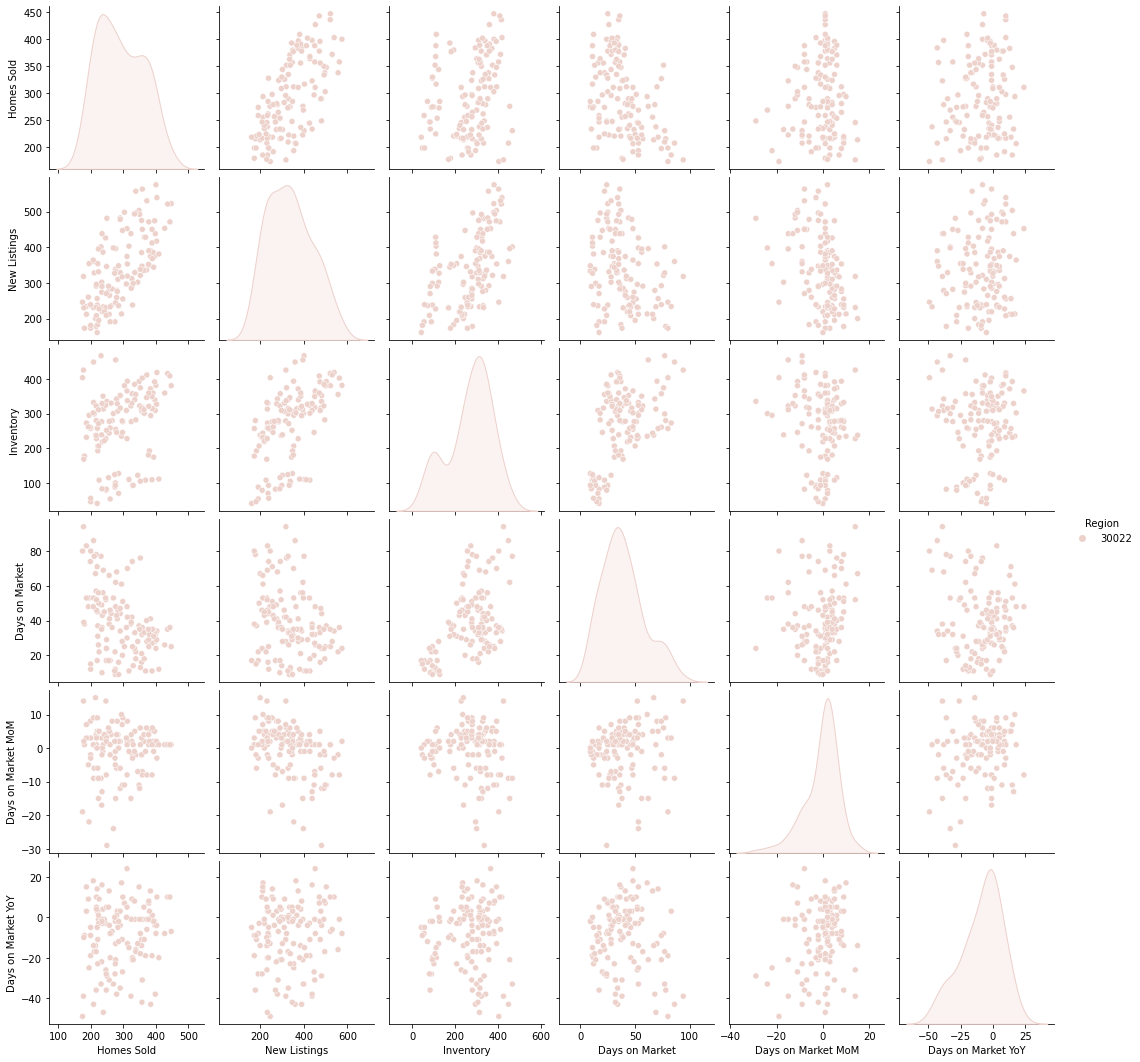

In [4]:
# pairplot based on column we choose for color scheme...will try Region
seaborn.pairplot(alpharetta_df,hue = 'Region')
# to show
plt.show()

In [5]:
brookhaven_df = house_market_df.loc[(house_market_df['Region'] == 30319), ['Region', 'Month of Period End', 'Median Sale Price',
       'Median Sale Price MoM ', 'Median Sale Price YoY ', 'Homes Sold',
       'Homes Sold MoM ', 'Homes Sold YoY ', 'New Listings',
       'New Listings MoM ', 'New Listings YoY ', 'Inventory', 'Inventory MoM ',
       ' Inventory YoY ', 'Days on Market', 'Days on Market MoM',
       'Days on Market YoY', 'Average Sale To List',
       'Average Sale To List MoM ', 'Average Sale To List YoY ']]
brookhaven_df.head()

,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
512,30319,Feb-22,"$313,000",17.90%,2.50%,124,-22.00%,-8.10%,214,12.60%,8.60%,339,-0.90%,-22.60%,90,-4,-74.0,93.70%,0.50%,2.60%
513,30319,Mar-22,"$328,000",5.00%,-0.50%,142,14.50%,-0.70%,257,20.10%,-4.80%,330,-2.70%,-27.60%,78,-12,-73.0,94.80%,1.10%,1.10%
514,30319,Apr-22,"$329,000",0.20%,5.40%,169,19.00%,-0.60%,273,6.20%,-13.30%,332,0.60%,-31.80%,84,6,-79.0,95.50%,0.70%,1.70%
515,30319,May-22,"$313,000",-5.00%,-2.30%,221,30.80%,13.30%,292,7.00%,-12.30%,340,2.40%,-31.70%,82,-2,-87.0,96.00%,0.50%,2.40%
516,30319,Jun-22,"$289,000",-7.50%,-16.20%,231,4.50%,14.90%,274,-6.20%,-10.20%,304,-10.60%,-33.30%,86,4,-67.0,95.80%,-0.30%,1.70%


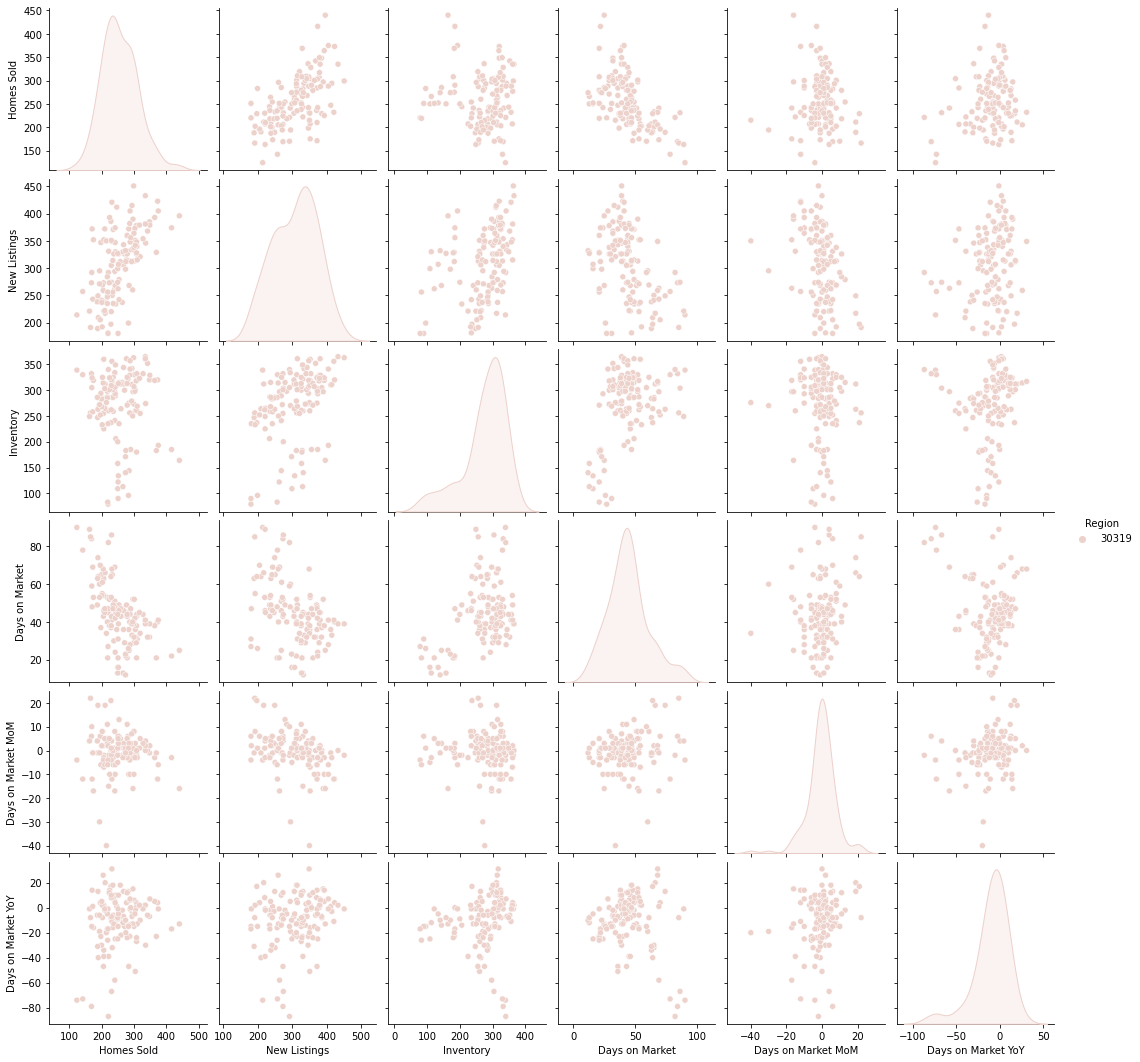

In [6]:
# pairplot based on column we choose for color scheme...will try Region
seaborn.pairplot(brookhaven_df,hue = 'Region')
# to show
plt.show()

In [7]:
buckhead_df = house_market_df.loc[(house_market_df['Region'] == 30625), ['Region', 'Month of Period End', 'Median Sale Price',
       'Median Sale Price MoM ', 'Median Sale Price YoY ', 'Homes Sold',
       'Homes Sold MoM ', 'Homes Sold YoY ', 'New Listings',
       'New Listings MoM ', 'New Listings YoY ', 'Inventory', 'Inventory MoM ',
       ' Inventory YoY ', 'Days on Market', 'Days on Market MoM',
       'Days on Market YoY', 'Average Sale To List',
       'Average Sale To List MoM ', 'Average Sale To List YoY ']]
buckhead_df.head()

,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
896,30625,Feb-22,"$147,000",-5.00%,40.30%,4,33.30%,300.00%,15,150.00%,275.00%,37,19.40%,270.00%,218,13,54.0,78.90%,1.10%,11.10%
897,30625,Mar-22,"$155,000",5.20%,5.80%,9,125.00%,125.00%,20,33.30%,233.30%,38,2.70%,245.50%,155,-63,15.0,90.50%,11.70%,10.10%
898,30625,Apr-22,"$270,000",74.20%,84.30%,11,22.20%,175.00%,22,10.00%,120.00%,33,-13.20%,106.30%,92,-63,-49.0,95.00%,4.40%,14.60%
899,30625,May-22,"$270,000",0.00%,60.70%,11,0.00%,266.70%,13,-40.90%,30.00%,31,-6.10%,82.40%,91,-1,-26.0,96.10%,1.20%,11.50%
900,30625,Jun-22,"$330,000",22.30%,1248.00%,6,-45.50%,500.00%,10,-23.10%,-16.70%,34,9.70%,61.90%,87,-5,-3.0,93.00%,-3.10%,-18.80%


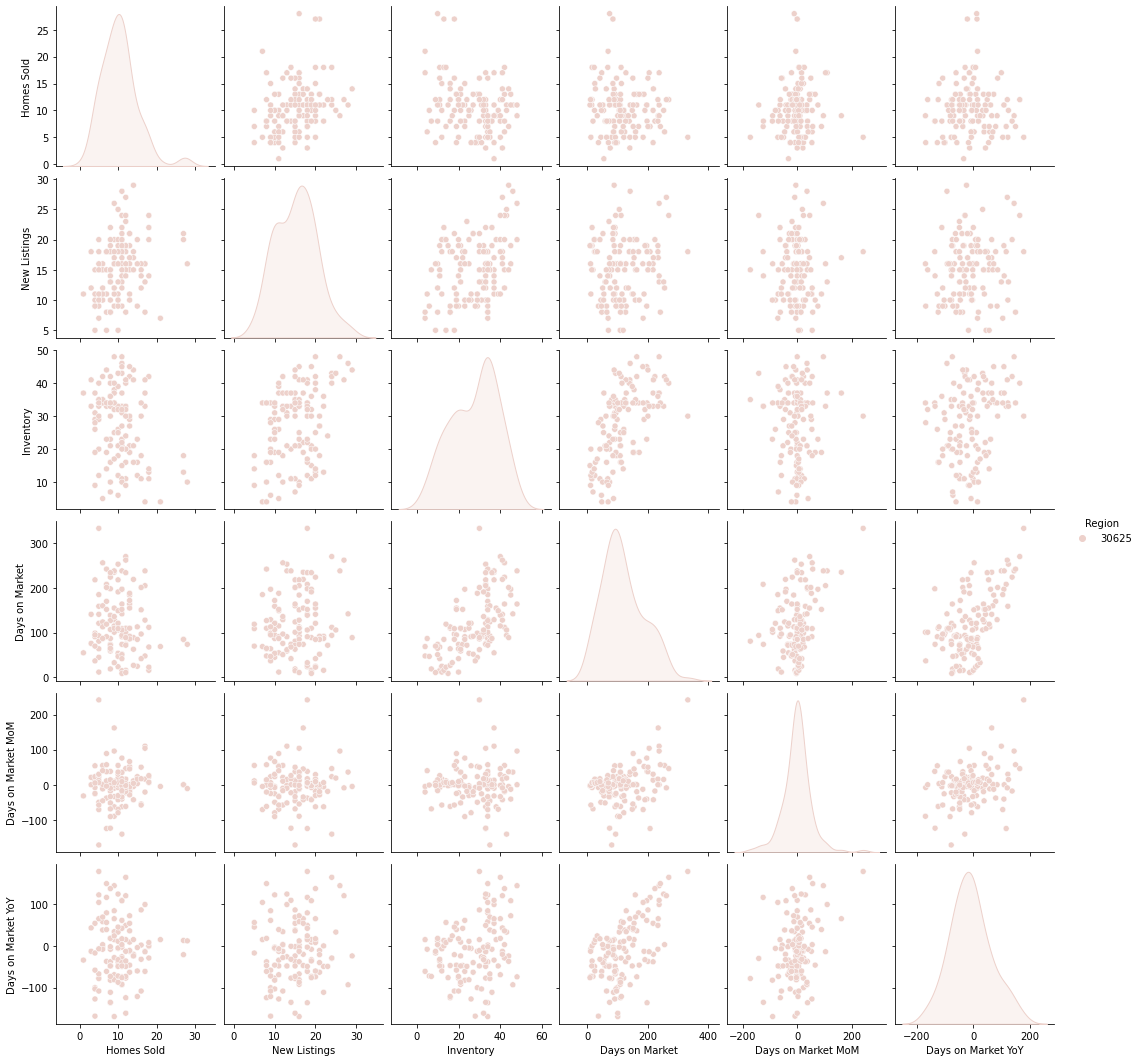

In [8]:
# pairplot based on column we choose for color scheme...will try Region
seaborn.pairplot(buckhead_df,hue = 'Region')
# to show
plt.show()

In [9]:
ndruidhills_df = house_market_df.loc[(house_market_df['Region'] == 30329), ['Region', 'Month of Period End', 'Median Sale Price',
       'Median Sale Price MoM ', 'Median Sale Price YoY ', 'Homes Sold',
       'Homes Sold MoM ', 'Homes Sold YoY ', 'New Listings',
       'New Listings MoM ', 'New Listings YoY ', 'Inventory', 'Inventory MoM ',
       ' Inventory YoY ', 'Days on Market', 'Days on Market MoM',
       'Days on Market YoY', 'Average Sale To List',
       'Average Sale To List MoM ', 'Average Sale To List YoY ']]
ndruidhills_df.head()

,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
768,30329,Feb-22,"$190,000",-5.00%,24.60%,50,2.00%,-10.70%,54,28.60%,-33.30%,98,2.10%,-38.00%,141,35,86.0,94.20%,-0.40%,-0.50%
769,30329,Mar-22,"$173,000",-9.20%,-0.30%,48,-4.00%,41.20%,78,44.40%,-26.40%,101,3.10%,-40.90%,145,4,44.0,95.10%,0.90%,2.90%
770,30329,Apr-22,"$190,000",10.10%,22.60%,51,6.30%,24.40%,96,23.10%,-8.60%,106,5.00%,-36.10%,145,0,57.0,97.00%,1.90%,3.10%
771,30329,May-22,"$185,000",-2.60%,23.30%,56,9.80%,-18.80%,90,-6.30%,-18.20%,97,-8.50%,-39.40%,80,-65,10.0,97.50%,0.50%,1.60%
772,30329,Jun-22,"$207,000",12.00%,35.90%,65,16.10%,-14.50%,95,5.60%,-9.50%,114,17.50%,-27.80%,41,-39,-44.0,97.40%,-0.10%,0.80%


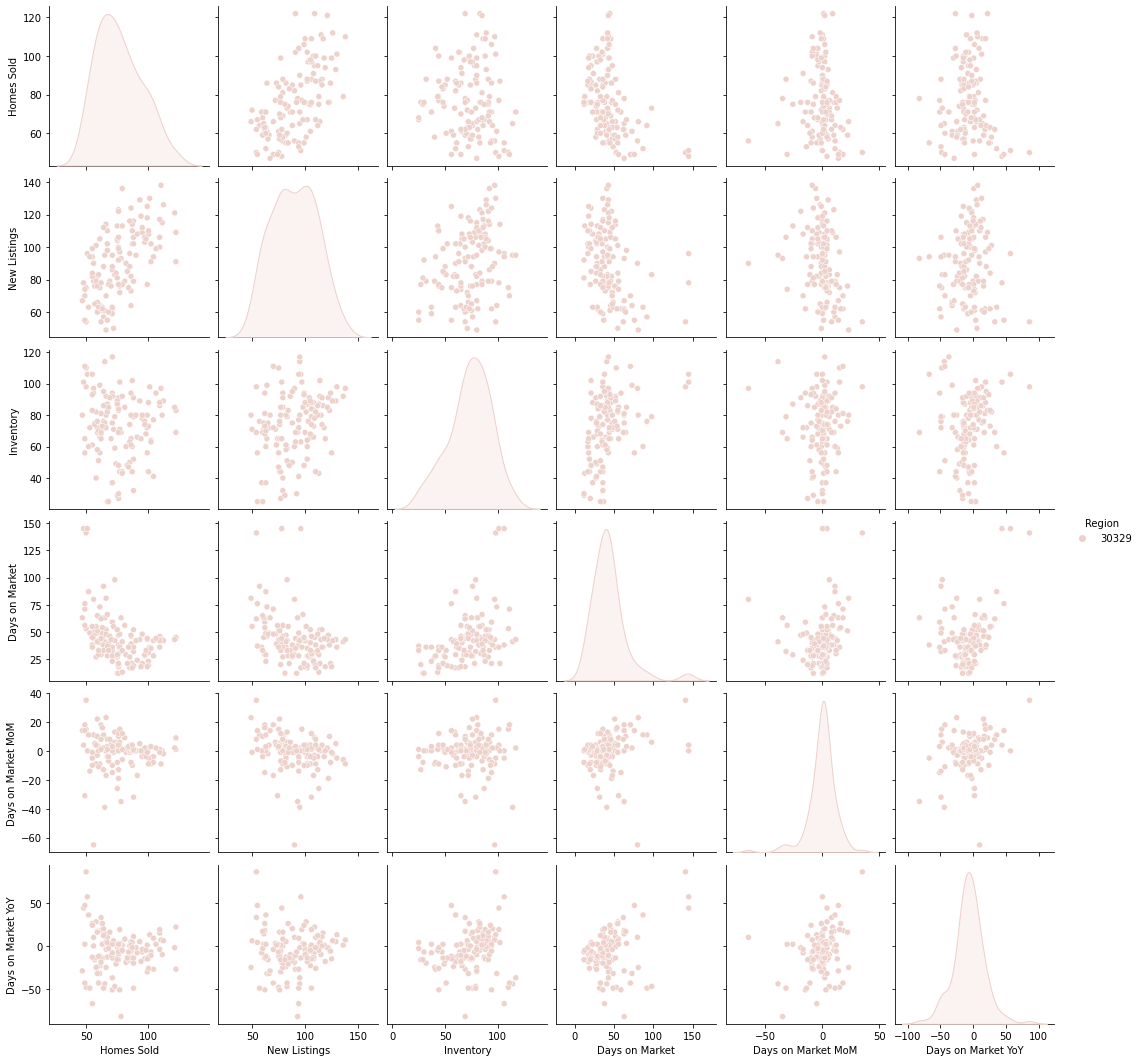

In [10]:
# pairplot based on column we choose for color scheme...will try Region
seaborn.pairplot(ndruidhills_df,hue = 'Region')
# to show
plt.show()

In [11]:
old4thward_df = house_market_df.loc[(house_market_df['Region'] == 30312), ['Region', 'Month of Period End', 'Median Sale Price',
       'Median Sale Price MoM ', 'Median Sale Price YoY ', 'Homes Sold',
       'Homes Sold MoM ', 'Homes Sold YoY ', 'New Listings',
       'New Listings MoM ', 'New Listings YoY ', 'Inventory', 'Inventory MoM ',
       ' Inventory YoY ', 'Days on Market', 'Days on Market MoM',
       'Days on Market YoY', 'Average Sale To List',
       'Average Sale To List MoM ', 'Average Sale To List YoY ']]
old4thward_df.head()

,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
384,30312,Feb-22,"$75,000",-0.70%,-26.70%,102,6.30%,41.70%,123,11.80%,-6.10%,171,1.20%,-34.20%,90,9,-31.0,95.80%,1.00%,2.10%
385,30312,Mar-22,"$71,000",-6.10%,-23.40%,105,2.90%,45.80%,156,26.80%,9.90%,161,-5.80%,-41.70%,83,-7,-32.0,97.00%,1.20%,2.20%
386,30312,Apr-22,"$110,000",56.00%,10.10%,117,11.40%,34.50%,156,0.00%,7.60%,159,-1.20%,-37.90%,88,5,-23.0,97.10%,0.10%,0.60%
387,30312,May-22,"$119,000",8.60%,13.40%,130,11.10%,56.60%,145,-7.10%,-1.40%,154,-3.10%,-35.80%,64,-25,-57.0,97.80%,0.70%,1.80%
388,30312,Jun-22,"$122,000",2.10%,30.50%,133,2.30%,27.90%,129,-11.00%,-8.50%,129,-16.20%,-43.40%,61,-3,-53.0,97.40%,-0.40%,0.50%


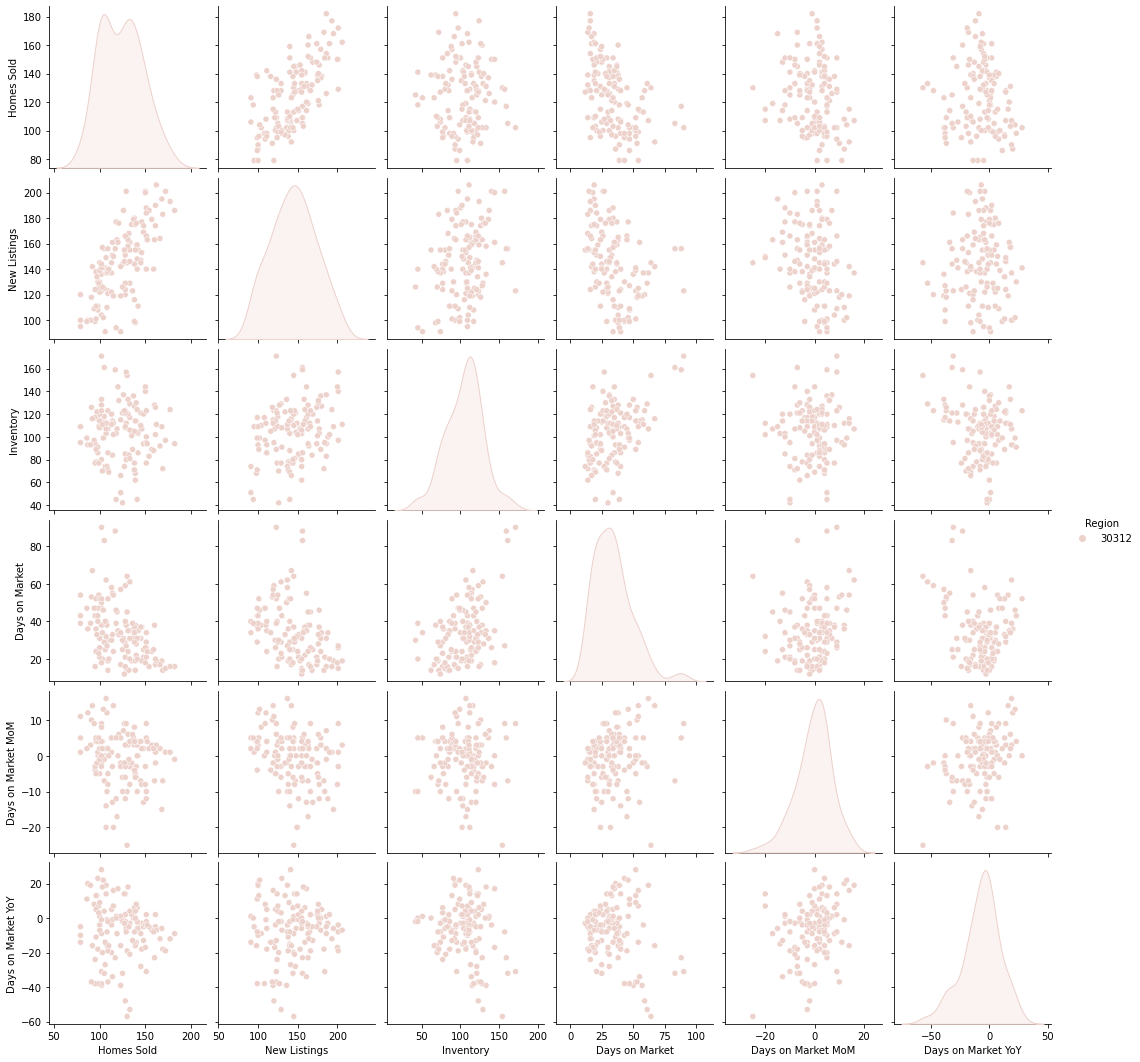

In [12]:
# pairplot based on column we choose for color scheme...will try Region
seaborn.pairplot(old4thward_df,hue = 'Region')
# to show
plt.show()

In [13]:
sandysprings_df = house_market_df.loc[(house_market_df['Region'] == 30328), ['Region', 'Month of Period End', 'Median Sale Price',
       'Median Sale Price MoM ', 'Median Sale Price YoY ', 'Homes Sold',
       'Homes Sold MoM ', 'Homes Sold YoY ', 'New Listings',
       'New Listings MoM ', 'New Listings YoY ', 'Inventory', 'Inventory MoM ',
       ' Inventory YoY ', 'Days on Market', 'Days on Market MoM',
       'Days on Market YoY', 'Average Sale To List',
       'Average Sale To List MoM ', 'Average Sale To List YoY ']]
sandysprings_df.head()

,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
640,30328,Feb-22,"$210,000",0.00%,-2.60%,124,13.80%,12.70%,198,10.60%,5.90%,330,-3.50%,-21.40%,119,-2,-15.0,93.70%,-0.70%,0.00%
641,30328,Mar-22,"$189,000",-10.00%,-8.50%,147,18.50%,11.40%,235,18.70%,-5.20%,336,1.80%,-19.60%,113,-6,-23.0,94.10%,0.50%,0.80%
642,30328,Apr-22,"$168,000",-11.40%,-21.30%,177,20.40%,26.40%,263,11.90%,-1.10%,358,6.50%,-18.30%,119,6,-3.0,94.60%,0.40%,0.30%
643,30328,May-22,"$194,000",16.10%,-7.40%,194,9.60%,26.80%,272,3.40%,0.00%,352,-1.70%,-15.00%,99,-20,-13.0,95.70%,1.10%,1.50%
644,30328,Jun-22,"$215,000",10.60%,-6.50%,201,3.60%,26.40%,263,-3.30%,4.00%,341,-3.10%,-18.80%,80,-19,-30.0,96.20%,0.50%,2.40%


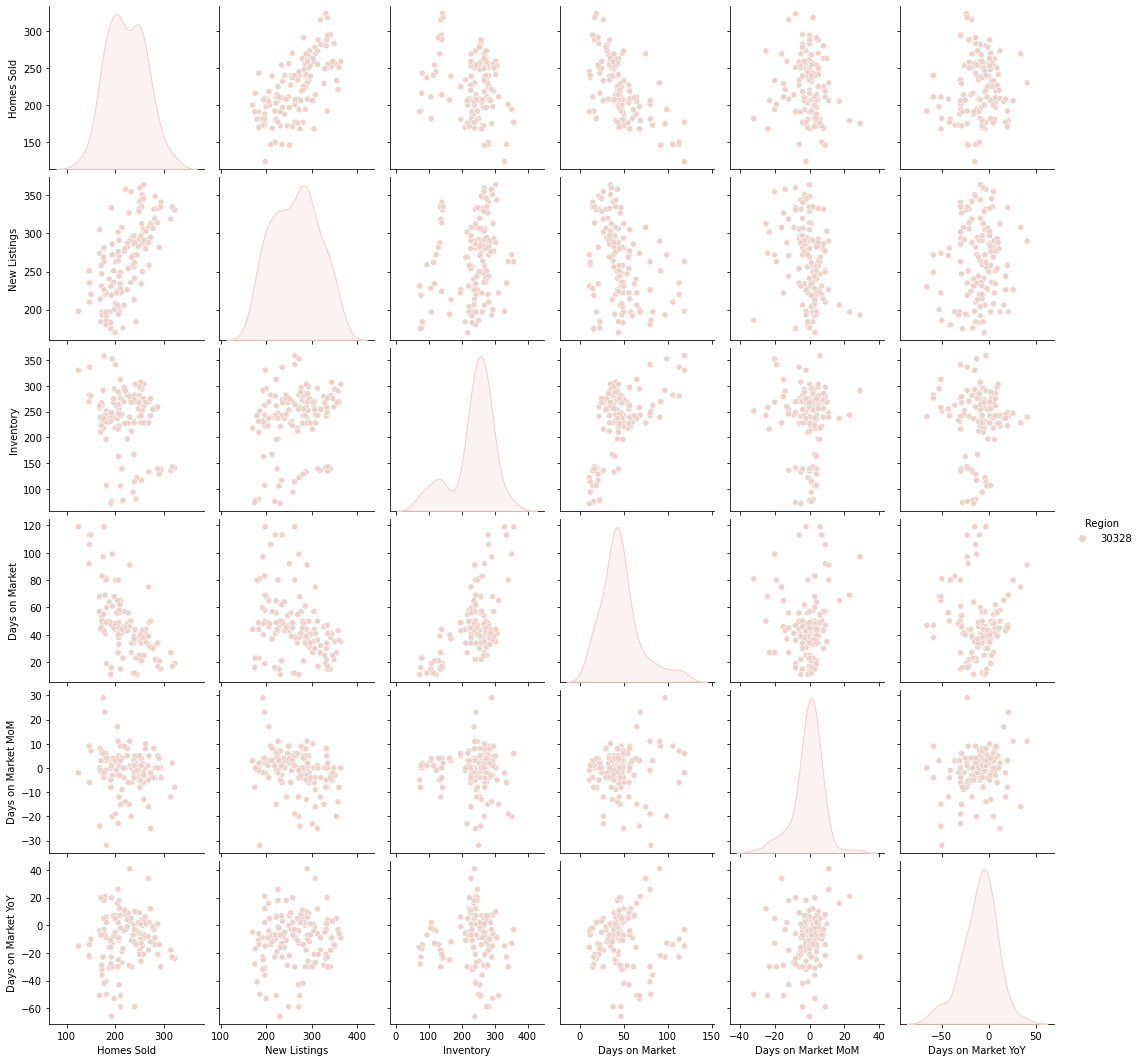

In [14]:
# pairplot based on column we choose for color scheme...will try Region
seaborn.pairplot(sandysprings_df,hue = 'Region')
# to show
plt.show()

In [15]:
suwanee_df = house_market_df.loc[(house_market_df['Region'] == 30024), ['Region', 'Month of Period End', 'Median Sale Price',
       'Median Sale Price MoM ', 'Median Sale Price YoY ', 'Homes Sold',
       'Homes Sold MoM ', 'Homes Sold YoY ', 'New Listings',
       'New Listings MoM ', 'New Listings YoY ', 'Inventory', 'Inventory MoM ',
       ' Inventory YoY ', 'Days on Market', 'Days on Market MoM',
       'Days on Market YoY', 'Average Sale To List',
       'Average Sale To List MoM ', 'Average Sale To List YoY ']]
suwanee_df.head()

,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
128,30024,Feb-22,"$185,000",0.00%,-12.50%,229,4.10%,23.10%,306,13.80%,-15.20%,461,-1.10%,-29.50%,94,-12,-3.0,96.00%,0.10%,1.30%
129,30024,Mar-22,"$190,000",2.70%,-5.00%,276,20.50%,30.80%,378,23.50%,-7.10%,458,-0.70%,-32.60%,99,5,-13.0,96.00%,0.00%,1.20%
130,30024,Apr-22,"$200,000",5.30%,11.10%,312,13.00%,10.20%,416,10.10%,-7.10%,461,0.70%,-32.10%,83,-17,-38.0,95.90%,0.00%,2.50%
131,30024,May-22,"$211,000",5.50%,10.50%,345,10.60%,8.20%,452,8.70%,-4.60%,498,8.00%,-27.00%,80,-3,-35.0,96.20%,0.30%,2.20%
132,30024,Jun-22,"$216,000",2.40%,11.90%,327,-5.20%,-5.80%,456,0.90%,0.00%,494,-0.80%,-25.30%,60,-20,-44.0,96.50%,0.20%,2.00%


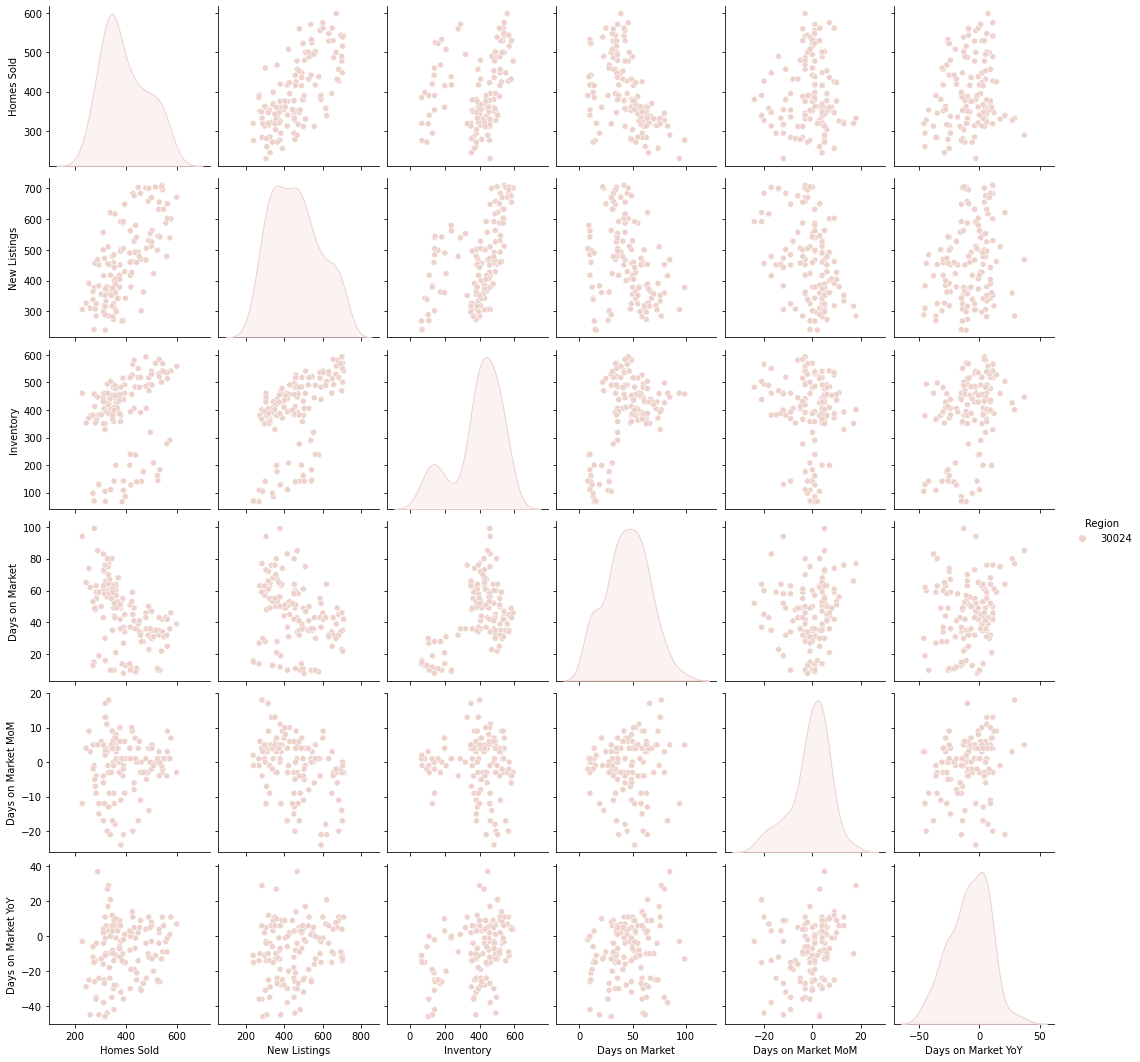

In [16]:
# pairplot based on column we choose for color scheme...will try Region
seaborn.pairplot(suwanee_df,hue = 'Region')
# to show
plt.show()

In [19]:
smyrna_df = house_market_df.loc[(house_market_df['Region'] == 30080), ['Region', 'Month of Period End', 'Median Sale Price',
       'Median Sale Price MoM ', 'Median Sale Price YoY ', 'Homes Sold',
       'Homes Sold MoM ', 'Homes Sold YoY ', 'New Listings',
       'New Listings MoM ', 'New Listings YoY ', 'Inventory', 'Inventory MoM ',
       ' Inventory YoY ', 'Days on Market', 'Days on Market MoM',
       'Days on Market YoY', 'Average Sale To List',
       'Average Sale To List MoM ', 'Average Sale To List YoY ']]
smyrna_df.head()

,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
256,30080,Feb-22,"$153,000",35.20%,-4.10%,170,4.30%,18.90%,230,7.00%,-17.30%,357,-1.90%,-32.50%,92,7,-4.0,95.50%,0.70%,1.50%
257,30080,Mar-22,"$165,000",7.50%,53.50%,185,8.80%,24.20%,283,23.00%,-6.90%,368,3.10%,-29.50%,100,8,3.0,96.50%,1.00%,2.20%
258,30080,Apr-22,"$111,000",-32.60%,4.20%,200,8.10%,6.40%,281,-0.70%,-17.80%,328,-10.90%,-39.70%,93,-7,1.0,97.30%,0.80%,4.10%
259,30080,May-22,"$115,000",3.40%,5.50%,235,17.50%,14.10%,290,3.20%,-11.90%,340,3.70%,-36.90%,78,-15,-16.0,98.20%,0.90%,4.80%
260,30080,Jun-22,"$100,000",-13.00%,-20.00%,241,2.60%,21.10%,282,-2.80%,-6.00%,347,2.10%,-32.80%,64,-15,-25.0,97.40%,-0.80%,3.80%


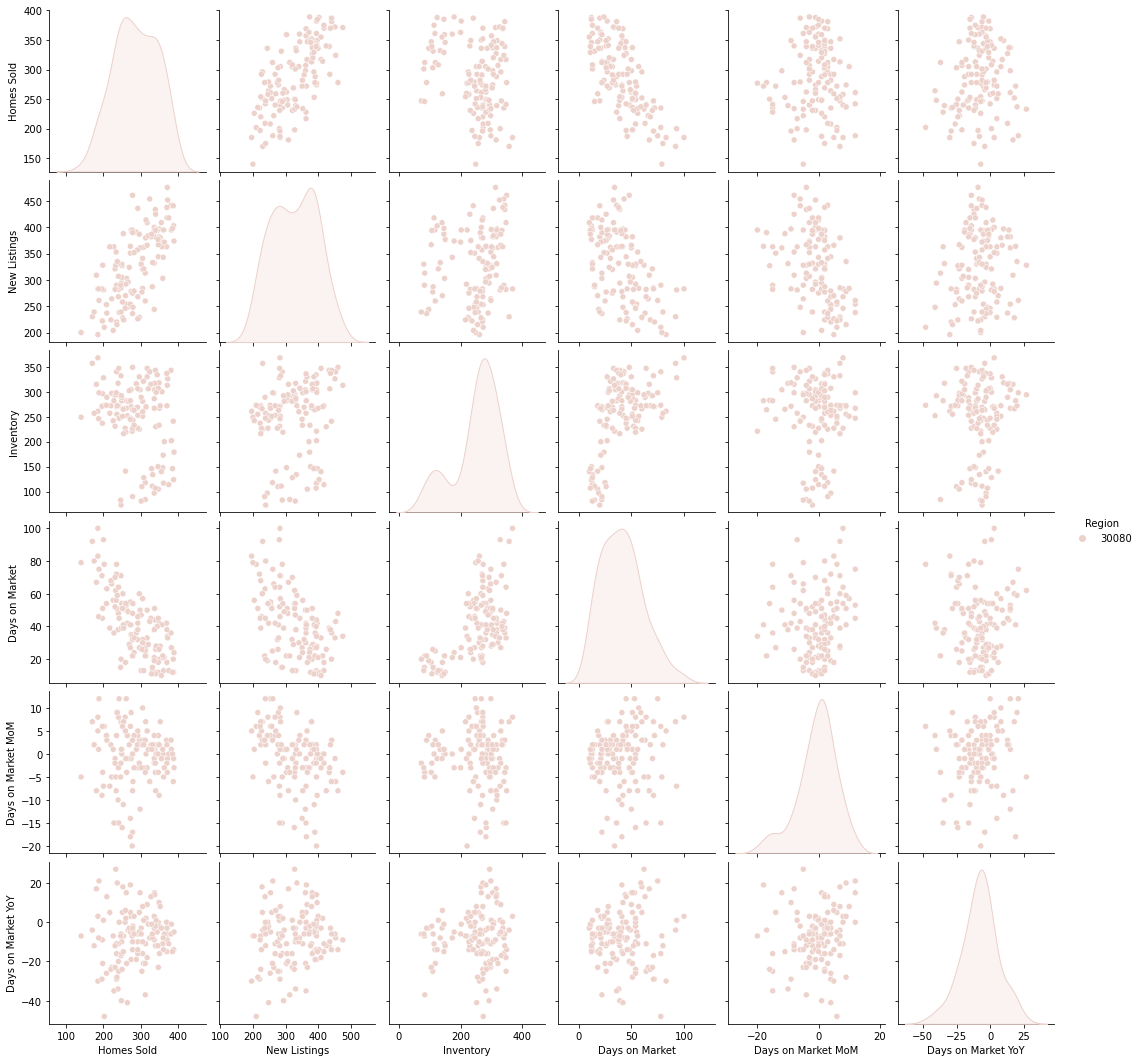

In [18]:
# pairplot based on column we choose for color scheme...will try Region
seaborn.pairplot(smyrna_df,hue = 'Region')
# to show
plt.show()